# INT20H test task

## Set up

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt

In [7]:
plt.rcParams.update({"figure.figsize": (20, 6)})

## Upload and prepare data

In [8]:
df = pd.read_csv("int20h-ds-test-dataset.csv")

In [9]:
df

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
0,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Success,"{""Make"":""Dodge"",""Model"":""Caravan"",""Color"":""Whi...",2022-01-16 17:03:04,android,samsung,SM-N975U
1,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Break,{},2022-01-16 17:07:47,android,samsung,SM-N975U
2,f344be2d9a042b7444f3cc5279e38ef1,FL,Calculator View,{},2022-01-16 17:16:25,android,samsung,SM-G973U1
3,c95c777785faec8dd910d019d7278ebe,CA,Add Payment Method Success,"{""Payment Method"":""Credit"",""Tokenized Pay"":""""}",2022-01-16 17:24:22,android,samsung,SM-N975U
4,e331ed81422d8fba55520a43a872e701,IL,Sign Up Success,"{""Method"":""Apple""}",2022-01-16 17:34:51,ios,Apple,"iPhone12,1"
...,...,...,...,...,...,...,...,...
23352,679eba26c4e75e0afb178360becfa21b,CA,Add Payment Method Success,"{""Payment Method"":""Credit"",""Tokenized Pay"":"""",...",2022-04-16 20:49:24,android,Google,Pixel 3a
23353,679eba26c4e75e0afb178360becfa21b,CA,Account Setup Profile Skip,"{""Screen"":""Address""}",2022-04-16 20:50:05,android,Google,Pixel 3a
23354,679eba26c4e75e0afb178360becfa21b,CA,Account Setup Profile Skip,"{""Screen"":""Phone Number""}",2022-04-16 20:50:10,android,Google,Pixel 3a
23355,679eba26c4e75e0afb178360becfa21b,CA,Chat Conversation Opened,"{""From"":""Dashboard"",""Transaction type"":""""}",2022-04-16 20:50:31,android,Google,Pixel 3a


In [40]:
events_by_usr = df[['userid', 'event_name']].groupby(by="userid", as_index=False).count().sort_values("event_name", ascending=False)
events_by_usr = events_by_usr.rename(columns={"event_name": "events_number"})
events_by_usr = events_by_usr.reset_index(drop=True)
events_by_usr

,userid,events_number
0,627f50253b42607513a1c93bb68201ad,498
1,dd3c7c5c898a4e6a4ed78d6e2c526bed,257
2,95e7c959d7d39be0a965e9e315906fed,231
3,ce84e058130e085513f0455bc725865e,211
4,31c1e16c643a0b79de9e269ee421a3bb,208
...,...,...
3535,9ed95957d1beec86d69f3c8676a7f44a,1
3536,3f00a4b14407777b8e317f6b0e0577a3,1
3537,b14edffbd51373fa1da2b9753ff14e14,1
3538,d11759b312c9e287a7f13403606437d0,1


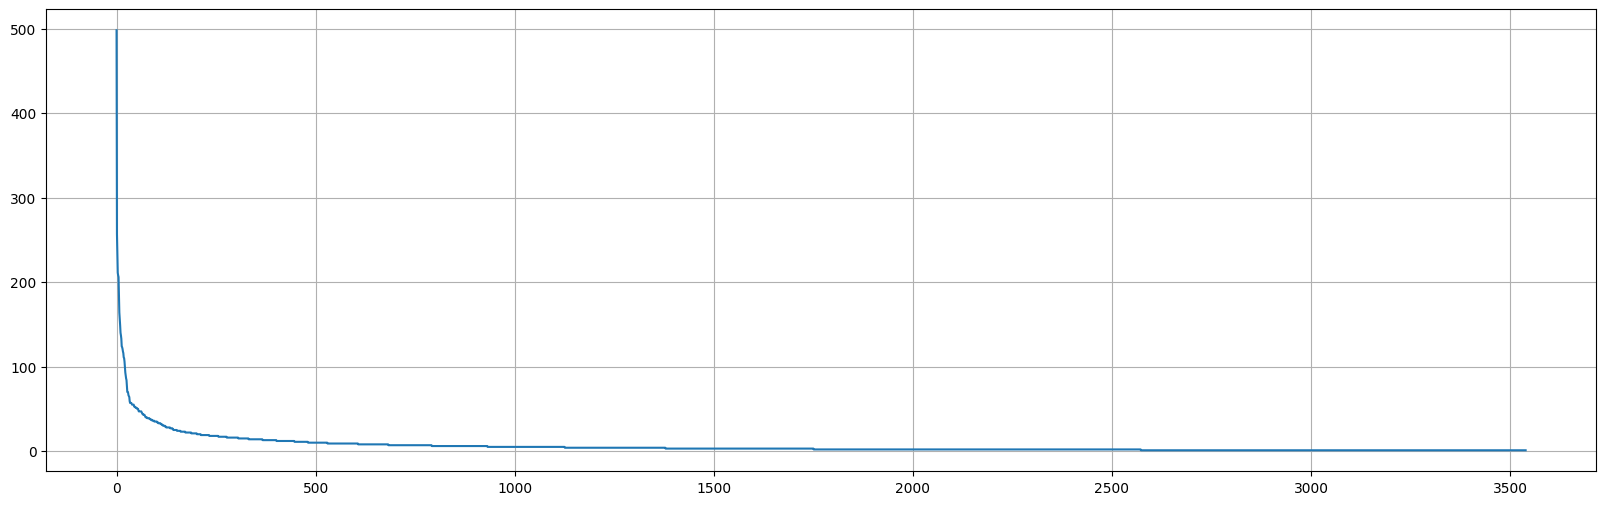

In [39]:
plt.plot(events_by_usr['events_number'])
plt.grid()
plt.show()

In [49]:
pd.json_normalize(list(df["event_attributes"]))

""
0
1
2
3
4
...
23352
23353
23354
23355


In [56]:
df.groupby("event_name").count().sort_values("userid", ascending=False)

,userid,user_state,event_attributes,event_created_date,event_platform,device_manufacture,device_model
event_name,,,,,,,
Order,6116,6116,6116,6116,6116,0,0
Sign Up Success,3329,3269,3329,3329,3329,3329,3329
Add Vehicle Success,1923,1922,1923,1923,1923,1923,1923
Account History Transaction Details,1609,1609,1609,1609,1609,1609,1609
Chat Conversation Opened,1485,1485,1485,1485,1485,1485,1485
Wallet Opened,1475,1474,1475,1475,1475,1475,1475
Chat Conversation Started,1202,1202,1202,1202,1202,1202,1202
Add Payment Method Success,1038,1037,1038,1038,1038,1038,1038
Email Confirmation Success,853,852,853,853,853,853,853


In [59]:
df[df['userid'] == "627f50253b42607513a1c93bb68201ad"].groupby("event_name").count()

,userid,user_state,event_attributes,event_created_date,event_platform,device_manufacture,device_model
event_name,,,,,,,
Account History Transaction Details,9,9,9,9,9,9,9
Add Payment Method Success,2,2,2,2,2,2,2
Add Vehicle Success,1,1,1,1,1,1,1
Chat Conversation Opened,1,1,1,1,1,1,1
Email Confirmation Success,1,1,1,1,1,1,1
Order,467,467,467,467,467,0,0
Sign Up Success,1,1,1,1,1,1,1
Subscription Premium,1,1,1,1,1,0,0
Wallet Opened,15,15,15,15,15,15,15
